# Demo
* Data pre-processing

* Nearest neighbors based classification

In [3]:
# Import the commonly-used modules
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("data/titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [4]:
# size of the data
print("(row, column):",data.shape)

(row, column): (891, 12)


In [5]:
# check for missing values
data.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass           0
Survived         0
dtype: int64

In [6]:
# one option is to just simply drop rows with any missing values
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)

(row, column) after dropping missing values:
 (183, 12)


In [7]:
# get one column from the data
data_name=data_no_missing_value["Name"]
data_name

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object

In [8]:
# get three columns from the data
data_sex_age_survived=data_no_missing_value[['Sex', 'Age', 'Survived']]
data_sex_age_survived

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
10,female,4.0,1
11,female,58.0,1
...,...,...,...
871,female,47.0,1
872,male,33.0,0
879,female,56.0,1
887,female,19.0,1


In [9]:
# encode categorical attributes
data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes
data_sex_age_survived

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Age,Survived
1,0,38.0,1
3,0,35.0,1
6,1,54.0,0
10,0,4.0,1
11,0,58.0,1
...,...,...,...
871,0,47.0,1
872,1,33.0,0
879,0,56.0,1
887,0,19.0,1


In [10]:
# define X and y
feature_columns=['Sex', 'Age']
X=data_sex_age_survived[feature_columns]
y=data_sex_age_survived.Survived
print(X.head())
print(y.head())

    Sex   Age
1     0  38.0
3     0  35.0
6     1  54.0
10    0   4.0
11    0  58.0
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [11]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# train a NN classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
# predict the test data
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6304347826086957


In [15]:
## kNN classifier (At workshop time) ## 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=142)

In [18]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
y_prediction=neigh.predict(X_test)

In [20]:
print("Accuracy score on test set by knn cliassifier : ",metrics.accuracy_score(y_test,y_prediction))

Accuracy score on test set by knn cliassifier :  0.6739130434782609


In [21]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.5434782608695652


# Task 1: Build a k-NN classifier

In [73]:
# Load the dataset
data = pd.read_csv("data/titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [74]:
# delete the attribute "Cabin"
del data['Cabin']

In [75]:
# fill missing values with the mean age
print("The mean age: ", data.Age.mean())
data.Age.fillna(data.Age.mean(), inplace=True)
# check for missing values
data.isnull().sum()

The mean age:  29.69911764705882


PassengerId    0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Pclass         0
Survived       0
dtype: int64

In [76]:
# drop rows with any missing values (the "Embarked" atrribute)
data = data[data.Embarked.notnull()]
# check for missing values
print(data.isnull().sum())
print("data size with no missing values: "+str(data.shape))

PassengerId    0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Pclass         0
Survived       0
dtype: int64
data size with no missing values: (889, 11)


A question: Are "PassengerId", "Name" and "Ticket" suitable for being a feature?
I think the answer is Yes. because these items like "PassengerId", "Name" and "Ticket" are useful for classfying (make machines learn) data. 

In [77]:
# Select all other attributes to form a data set
data_reduced = pd.DataFrame(data.drop(['PassengerId', 'Name', 'Ticket'], axis='columns'))
data_reduced.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Survived
0,male,22.0,1,0,7.2500,S,3,0
1,female,38.0,1,0,71.2833,C,1,1
2,female,26.0,0,0,7.9250,S,3,1
3,female,35.0,1,0,53.1000,S,1,1
4,male,35.0,0,0,8.0500,S,3,0


In [78]:
# encode the categorical attributes where applicable
data_reduced['Sex'] = data_reduced['Sex'].astype('category').cat.codes
data_reduced['Embarked'] = data_reduced['Embarked'].astype('category').cat.codes
data_reduced.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Survived
0,1,22.0,1,0,7.2500,2,3,0
1,0,38.0,1,0,71.2833,0,1,1
2,0,26.0,0,0,7.9250,2,3,1
3,0,35.0,1,0,53.1000,2,1,1
4,1,35.0,0,0,8.0500,2,3,0


In [79]:
# build a 1-NN classification model where "Survived" is the prediction target
X = data_reduced.drop('Survived', axis='columns')
y = data_reduced['Survived']

In [80]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
# Build a 1-NN classification model
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6771300448430493


# Task 2 Tune the hyper parameters


In [90]:
# mannually try other k values, e.g., 2, 3, 5, 10, the accuracy comparison

#2NN
clf=neighbors.KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7130044843049327


In [91]:
#3NN
clf=neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.726457399103139


In [92]:
#5NN
clf=neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6905829596412556


In [93]:
#10NN
clf=neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7085201793721974


In [95]:
# use k-fold cross-validation (10-fold cross validation)
from sklearn.model_selection import cross_val_score
n_values = range(1, 11) 
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy') 
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.69 (+/- 0.04)
Accuracy: 0.70 (+/- 0.04)
Accuracy: 0.72 (+/- 0.05)
Accuracy: 0.70 (+/- 0.04)
Accuracy: 0.70 (+/- 0.03)
Accuracy: 0.69 (+/- 0.03)
Accuracy: 0.72 (+/- 0.05)
Accuracy: 0.69 (+/- 0.04)
Accuracy: 0.71 (+/- 0.05)
Accuracy: 0.70 (+/- 0.04)


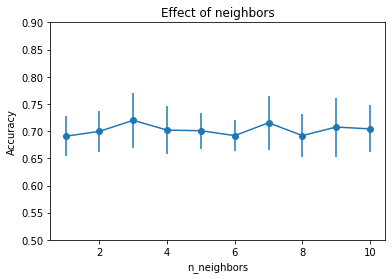

In [84]:
# visualize
import matplotlib.pyplot as plt
accuracy_scores = list()
accuracy_scores_std = list()
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy') 
    accuracy_scores.append(scores.mean()) 
    accuracy_scores_std.append(scores.std())
plt.errorbar(n_values, accuracy_scores, yerr=accuracy_scores_std, marker='o')
plt.title('Effect of neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.9)
plt.show()

In [89]:
# Use grid search to faciliate the identification of the best hyper parameter
from sklearn.model_selection import GridSearchCV 
tuned_parameters = [{'n_neighbors': range(1, 11)}]
search = GridSearchCV(neighbors.KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv=10)
search.fit(X_train, y_train)
print("Best parameters set found on training set:")
print(search.best_params_)

Best parameters set found on training set:
{'n_neighbors': 9}


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Task 3 Build a decision tree model for the above classification task

In [86]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])